<div style="text-align:center">
<img src="img/intro_correspondre.png">
</div>


*** CREATION IN PROGRESS ***<br>
Notebook created by GITHUB ESTELLE DERRIEN

## Summary

15. <b> Modeling of a multiperiod production and storage problem </b>
    - 15.1 Taïwan university instance ( Coursera chpt 2.8 )
    - 15.2 Mathematical modeling
    - 15.3 Python Pulp solution ( hard coded )
    - 15.4 Python Pulp solution ( compact model )
    - 15.5 Winston book / Indiana university instance : National steel corporation
    - 15.6 Mathematical modeling
    - 15.7 Python Pulp solution and book solution comparison
16. <b> Modeling of a multiperiod cash flow matching </b>
    - 16.1 Columbia university instance : Project funding 
    - 16.2 Mathematical modeling ( hard coded )
    - 16.3 Python Pulp solution and course solution comparison
    - 16.4 Mathematical modeling ( compact model  )
    - 16.5 Washington university instance : Finco Investment Corporation
    - 16.6 Mathematical modeling (Hard coded)
    - 16.7 Python Pulp solution and book solution comparison 
    - 16.8 Mathematical modeling ( compact model  )
    - 16.9 Lingo instance : Multi-period Financial Model
    - 16.10 Mathematical modeling (hard coded )
    - 16.11 Python Pulp Solution
    - 16.12 Mathematical modeling (compact model )
    - 16.13 Python Pulp Solution
17. <b>Modeling of a multiperiod work scheduling</b>
    - 17.1 Instance - Washington University - Wagner(1975) type of problem
    - 17.2 Mathematical modeling
    - 17.3 Python Pulp solution
18. <b>Modeling of an optimal employees time shift scheduling problem</b>
    - 18.1 Instance - Microsoft problem : "Using Solver to schedule your workforce".
    - 18.2 Mathematical modeling (Hard coded model)
    - 18.3 Python Pulp solution
    - 18.4 Mathematical modeling and solution (Compact model)
    - 18.5 Instance - Minimizing employees number by E. Mahalakshmi 1, S. Akila 2
    - 18.6 Mathematical modeling (Hard coded and compact model)
    - 18.7 Python Pulp solution
    - 18.8 Instance - Nurses day time shift problem (Stack overflow correction)
    - 18.9 Mathematical modeling (Hard coded and compact model)
    - 18.10 Python Pulp solution
    - 18.11 Instance - Nurses day time shift Excel problem
    - 18.12 Mathematical modeling (Hard coded and compact model)
    - 18.13 Python Pulp solution
19. <b>Modeling of a linear portfolio optimization / allocation problem</b>
    - 19.1 Instance by Kenneth A Barker
    - 19.2 Mathematical modeling
    - 19.3 Python Pulp solution
    - 19.4 Instance by Mastering python for finance p.96
    - 19.5 Mathematical modeling
    - 19.6 Python Pulp solution
    - 19.7 Instance 
    - 19.8 Mathematical modeling
    - 19.9 Python Pulp solution
    - 19.10 Instance by Andrew Hershy
    - 19.11 Mathematical modeling
    - 19.12 Python Pulp solution
20. <b>Modeling of a facility location problem</b>
    - 20.1 Instance - single facility location Weber problem (minimize distance)
    - 20.2 Mathematical modeling
    - 20.3 Solving using the SKLearn Kmeans centroids method
    - 20.4 Solving for multiples centroids
    - 20.5 Python Pulp solution
    - 20.6 Instance - Taïwan university minimum facility location (minimize amount of)
    - 20.7 Mathematical modeling
    - 20.8 Python Pulp solution 
    - 20.9 Instance minimum facility location  extension 1
    - 20.10 Instance minimum facility location  extension 2
    - 20.11 Chang Yaochen code analysis
    - 20.12 Instance - Fixed charge facility location cost minimization  (minimize amount of)
    - 20.13 Mathematical modeling (Compact model)
    - 20.14 Python Pulp solution 
    - 20.15 Instance - facility location picking and profit maximization  (minimize amount of)
    - 20.16 Mathematical modeling (Compact model)
    - 20.17 Python Pulp solution (Hard coded)

21. <b> Modeling of a single machine scheduling problem</b>
    - 21.1 Single machine, parallels ,flow shop and job shop differences.
    - 21.2 Instance
    - 21.3 Mathematical modeling
    - 21.4 Handy solution try
    - 21.5 Itertools solution
    - 21.4 Python Pulp solution
22. <b> Modeling of a parallels machines jobs costs assignment minimization</b>
    - 22.1 Instance
    - 22.2 Math model
    - 22.3 Python Pulp solution

22. <b> Modeling an uncapacited transport problem </b>
    - Presentation 
    - Mathematical modeling
    - Python Pulp or Cplex solution
23. <b> Modeling a fixed charges transport problem  </b>
    - 23.1 Instance -  modeling of a fixed charge transport optimization
    - 23.2 Mathematical modeling (Daskin (2003) Compact model)
    - 23.3 Python Pulp solution (Hard coded)
    - 23.4 Python Pulp solution (Compact model)
    - 23.5 Gurobi solution (Compact model)
    - 23.6 Instance - Cornell university capacited transport profit maximization
    - 23.7 Mathematical modeling (Compact model)
    - 23.8 Python Pulp solution (Hard coded)
    - 23.9 Python Pulp solution (Compact model)

24. <b> Modeling a bin packing problem  </b>
    - Presentation and differences between 2d and 3d
    - Mathematical modeling
    - Python Pulp or Cplex solution
25. <b> Modeling a traveling salesman problem  </b>
    - Presentation 
    - Mathematical modeling
    - Python Pulp or Cplex solution
26. <b> Modeling a shortest path problem  </b>
    - Presentation of https://blog.sommer-forst.de/2013/04/06/solving-the-minimum-cost-flow-problem-4-pulp/
    - https://transport-systems.imperial.ac.uk/tf/60008_21/n3_6_shortest_paths_pulp.html
    - Mathematical modeling
    - Python Pulp or Cplex solution
27. <b> Modeling a chemistry combinatorial optimization  </b>
    - Presentation of the Mac Graw Book problem BOILER/TURBO-GENERATOR SYSTEM
    - Mathematical modeling
    - Python Pulp or Cplex solution
28. <b> Modeling a petroleum combinatorial optimization </b>
    - Presentation and Kirchhoff constraints
    - Mathematical modeling
    - Python Pulp or Cplex solution
29. <b> Modeling of a multiple objectives problem</b>
    - Presentation of https://www.supplychaindataanalytics.com/multi-objective-linear-optimization-with-pulp-in-python/
    - Mathematical modeling
    - Python Pulp or Cplex solution
30. <b> Getting familiar with sensitivity analysis</b>
    - Displaying Reduced costs
    - Displaying The Shadow Price
    - Displaying Slacks variables
31. <b> Getting familiar with variables relaxations</b>

32. <b> Linearizations </b>
    - Linearization technics using the AIMMS modeling guide and Ling-Chieh Kung technics
    - Objective linearizations
    - Constraints linearizations
    - Examples using Python solvers


33. <b> Apendix </b> 
- Importing a data instance from an Excel file
- Importing a data instance from a Database

# <b>15. Modeling of a multiperiod production and storage problem </b>

<div style="text-align:center">
<img src="img/TopCable.jpg" width="500"/>
</div>

## <b>15.1 Taïwan university Instance</b>

The manager predicts that we'll sell 100, 150, 200, and 170 on days 1, 2, 3, and 4 of the next week.

Production costs vary depending on the day of the week:
9th, 12th, 10th, and 12th on days 1, 2, 3, and 4 of the next week.

The storage cost is €1 per item stored, so if we keep it for 4 days, that's a cost of €4.

What is the best production plan to minimize costs and not have too much inventory?*

Link : https://www.coursera.org/learn/operations-research-modeling/lecture/vW447/2-8-simple-lp-formulation-production-and-inventory

## <b>15.2 Math model</b><br>
Hard coded model :<br>
<img src="img/01. Formulation du L.P.png"></img>




## <b>15.3 Python Pulp solution</b>
<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

Hard coded version :

In [451]:
# -----------------------------------
# Import Pulp
# -----------------------------------
import pulp

# -----------------------------------
# Type of problem
# -----------------------------------
problem = pulp.LpProblem("multiperiod_lp",pulp.LpMinimize)

# -----------------------------------
# Decision variables
# -----------------------------------
# Items production per day 1,2,3,4
P1 = pulp.LpVariable('Prodution1', lowBound=0, cat='Integer')
P2 = pulp.LpVariable('Prodution2', lowBound=0, cat='Integer')
P3 = pulp.LpVariable('Prodution3', lowBound=0, cat='Integer')
P4 = pulp.LpVariable('Prodution4', lowBound=0, cat='Integer')


# Inventory per day 1,2,3,4
I1 = pulp.LpVariable('Inventory1', lowBound=0, cat='Integer')
I2 = pulp.LpVariable('Inventory2', lowBound=0, cat='Integer')
I3 = pulp.LpVariable('Inventory3', lowBound=0, cat='Integer')
I4 = pulp.LpVariable('Inventory4', lowBound=0, cat='Integer')

# -----------------------------------
# Math model
# -----------------------------------

# Objective function : minimizing production costs + inventory costs (1$ per item in inventory)
problem += (9*P1 + 12*P2 + 10*P3 + 12*P4) + (1*I1 + 1*I2 + 1*I3 + 1*I4) 

# Inventory balancing constraints
problem += P1 - 100 == I1
problem += I1 + P2 - 150 == I2
problem += I2 + P3 - 200 == I3
problem += I3 + P4 - 170 == I4

problem += P1 >= 0
problem += P2 >= 0 
problem += P3 >= 0 
problem += P4 >= 0 

# -----------------------------------
# Solution
# -----------------------------------
result = problem.solve()

# Printing solution
print("---First day---")
print("Production:" ,pulp.value(P1))
print("Inventory:" ,pulp.value(I1))


print("---2nd day---")
print("Production:" ,pulp.value(P2))
print("Inventory:" ,pulp.value(I2))

print("---3rd day---")
print("Production:" ,pulp.value(P3))
print("Inventory:" ,pulp.value(I3))

print("---4th day---")
print("Production:" ,pulp.value(P4))
print("Inventory:" ,pulp.value(I4))

print("Minimized production and storage cost = :" ,pulp.value(problem.objective))



---First day---
Production: 250.0
Inventory: 150.0
---2nd day---
Production: 0.0
Inventory: 0.0
---3rd day---
Production: 370.0
Inventory: 170.0
---4th day---
Production: 0.0
Inventory: 0.0
Minimized production and storage cost = : 6270.0


<b>Solution Explanation</b>

Our multi-period interval here is 4 days.

The solver calculates what needs to be produced and put into inventory in order to end up with no inventory on hand at the end of these 4 days, while still meeting demand.

On the first day, we produce 250 units, which meets the manager's forecast of selling 100 units on the first day, and we keep 150 units in inventory for the second day.

On the third day, we produce 370 units, still with the aim of meeting the manager's forecast for the following 2 days, and we keep 170 units in inventory.

On the fourth day, we have minimized our inventory and our carrying costs, and we have nothing left.



## <b>15.4 Compact model </b>

$$
Min (C) = \sum_{t=1}^{4} (c_{t}.x_{t} + sc_{t}.y_{t})
$$
$$
subject \thinspace to
$$
$$
  y_{t-1} + x_{t} - d_{t} = y_{t} \thinspace ∀ \thinspace t \in (1,...,4)
$$
$$
y_{0} = 0
$$

$$
where
$$

$$
 c_{t} = production \thinspace cost
$$
$$
 sc_{t} = storage \thinspace cost
$$
$$
 d_{t} = demand
$$

## <b>15.4 Python Pulp solution </b>


<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

In [452]:
# -----------------------------------
# Import Pulp
# -----------------------------------
from pulp import *

# -----------------------------------
# Type of problem
# -----------------------------------
model = LpProblem("multiperiod_lp",LpMinimize)

# -----------------------------------
# Instance
# -----------------------------------
# Define the production and storage costs for days 1, 2, 3, and 4; in quarters, it's the number of days, i.e., 4.
# Define production cost, inventory cost, and demand.
# Define the production costs per period, the inventory cost, and the demand reported by the sales department.
quaters = list(range(4))
c       =[9,12,10,12] # production cost
sc      =[1,1,1,1]
d       =[100,150,200,170]

# -----------------------------------
# Decision variables
# -----------------------------------
x = LpVariable.dicts('quater_prod_', quaters,lowBound=0, cat='Continuous')
y = LpVariable.dicts('quater_inventory_', quaters,lowBound=0, cat='Continuous')

# -----------------------------------
# Math model
# -----------------------------------
# Objective
model += lpSum([c[t]*x[t] for t in quaters]) + lpSum([sc[t]*y[t] for t in quaters])

# Constraints

# Inventory-balance constraints
model.addConstraint(x[0] - y[0] == d[0]) # (day 1)

for t in quaters[1:]: # For all day from 2 to 4
    model.addConstraint(x[t] - y[t] + y[t-1] == d[t]) # (days 2, 3, 4) # Not written the same as math model but it's still the same

# -----------------------------------
# Solution
# -----------------------------------
model.solve()

for v in model.variables():
    print(v.name, "=", v.varValue)
    
print("Minimized production and storage cost =  ", value(model.objective))

quater_inventory__0 = 150.0
quater_inventory__1 = 0.0
quater_inventory__2 = 170.0
quater_inventory__3 = 0.0
quater_prod__0 = 250.0
quater_prod__1 = 0.0
quater_prod__2 = 370.0
quater_prod__3 = 0.0
Minimized production and storage cost =   6270.0


## <b>15.5 Winston book / Indiana university instance  : National steel corporation</b>


<div style="text-align:center">
<img src="img/iStock-1151115902_scrap-metal.jpg" width="500"/>
</div>

National Steel Corporation (NSC) produces a special-purpose steel
used in the aircraft and aerospace industries. The sales department
has received orders for the next four months...

Read : http://www.columbia.edu/itc/sipa/U6033/client_edit/lectures/lec4.pdf

Please notice: I am not responsible to leave this book part on the internet.




NSC can meet demand by producing steel, drawing on its
inventory, or a combination of these.Inventory at the start of
January is zero.Production costs are expected to increase in February and March.
Production and stock costs are:

<table>
  <tr>
    <th></th>
    <th>January</th>
     <th>February</th>
      <th>March</th>
       <th>April</th>
  </tr>
  <tr>
  <td>Production cost</td>
    <td>3000</td>
    <td>3300</td>
    <td>3600</td>
    <td>3600</td>
  </tr>
    <tr>
  <td>Inventory cost</td>
    <td>250</td>
    <td>250</td>
    <td>250</td>
    <td>250</td>
  </tr>
</table>

Production costs are dollars per tonne. 
Inventory costs are in dollars per tonne and per month. 

For example, 1 ton in stock for 1 month costs 250 dollars;for 2
months it costs $ 500.

NSC can produce a maximum of 3,000 tonnes of steel per month. 
What production plan does it respond to demand at the minimum cost?

## <b>15.6 Maths model</b><br>
Compact model :
$$
Min (C) = \sum_{t=1}^{4} (c_{t}.x_{t} + sc_{t}.y_{t})
$$
$$
subject \thinspace to
$$
$$
  y_{t-1} + x_{t} - d_{t} = y_{t} \thinspace ∀ \thinspace t \in (1,...,4)
$$
$$
y_{0} = 0
$$

$$
where
$$

$$
 c_{t} = production \thinspace cost
$$
$$
 sc_{t} = storage \thinspace cost
$$
$$
 d_{t} = demand
$$


## <b>15.7 Python Pulp solution</b>
<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

In [453]:
# -----------------------------------
# Import Pulp
# -----------------------------------
from pulp import *

# -----------------------------------
# Type of problem
# -----------------------------------
model = LpProblem("multiperiod_production_minimize_cost",LpMinimize)

# -----------------------------------
# Instance
# -----------------------------------
quaters =   list(range(4))
c       =   [3000, 3300, 3600, 3600]
sc      =   [250, 250, 250, 250]
d       =   [2300, 2000, 3100, 3000]

# -----------------------------------
# Decision variables
# -----------------------------------
x = LpVariable.dicts('quater_prod_', quaters,lowBound=0, cat='Continuous')
y = LpVariable.dicts('quater_inventory_', quaters,lowBound=0, cat='Continuous')

# -----------------------------------
# Math model
# -----------------------------------
# Objective
model += lpSum([c[t]*x[t] for t in quaters]) + lpSum([sc[t]*y[t] for t in quaters])

# Constraints

# Inventory-balance constraints
model.addConstraint(x[0] - y[0] == d[0]) # (day 1)

for t in quaters[1:]:
    model.addConstraint(x[t] - y[t] + y[t-1] == d[t]) # (days 2, 3, 4) 

# Production-capacity constraints 
for i in quaters:
    model.addConstraint(x[i]<=3000)

# -----------------------------------
# Solution
# -----------------------------------
model.solve()

for v in model.variables():
    print(v.name, "=", v.varValue)
    
print("Minimized production and storage cost =  ", value(model.objective))

quater_inventory__0 = 700.0
quater_inventory__1 = 1700.0
quater_inventory__2 = 0.0
quater_inventory__3 = 0.0
quater_prod__0 = 3000.0
quater_prod__1 = 3000.0
quater_prod__2 = 1400.0
quater_prod__3 = 3000.0
Minimized production and storage cost =   35340000.0


We see that the python pulp solution is the same than the Winston book / Indiana university Excel one, looking good, bro.

<div style="text-align:center">
<img src="img/thumbs-up.jpg" width="100">
</div>

Here is a screen cap :
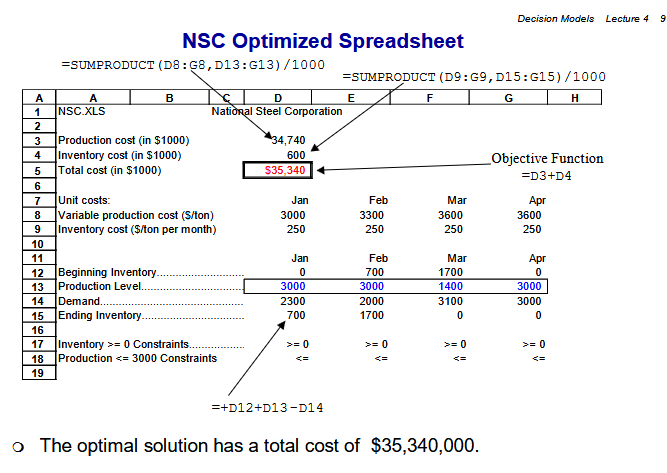

# <b> 16.  Modeling of a multiperiod cash flow matching </b>

<div style="text-align:center">
<img src="img/cfm.webp" width="500"/>
</div>

## <b>16.1 Columbia university Instance : Project funding problem</b>
<div style="text-align:center">
<img src="img/project-funding.png" >
</div>

Read : http://www.columbia.edu/itc/sipa/U6033/client_edit/lectures/lec4.pdf



## <b>16.2 Math model ( Hard coded )</b><br>
$$
Min (C) = 1.04x{1} + 1.00x{2} + 0.98x{3} + 0.92x{4}
$$
$$
subject \thinspace to
$$
$$
 0.05x{1} + 0.04x{2} + x{3} >= 20 \thinspace (year \thinspace 2002)
$$
$$
 0.05x{1} + 1.04x{2} + x{4} >= 30 \thinspace (year \thinspace 2003) 
$$
$$
  1.05x{1}  >= 40 \thinspace (year \thinspace 2004)
$$
$$
x_{j} >= 0 \thinspace ∀ \thinspace j \in (1,...,4)
$$

$$
where
$$

$$
 x_{j} = number \thinspace of \thinspace bonds \thinspace ( \thinspace In \thinspace millions \thinspace of \thinspace bonds)
$$



## <b>16.3 Python Pulp solution ( Hard coded )</b>
<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

In [454]:
# -----------------------------------
# Import Pulp
# -----------------------------------
from pulp import *

# -----------------------------------
# Type of problem
# -----------------------------------
problem = LpProblem("cashFlow_matching",LpMinimize)

# -----------------------------------
# Decisions variables
# -----------------------------------
# Xj = # of bond j to purchase today (in millions of bonds)
X1 = pulp.LpVariable('X1', lowBound=0, cat='Continuous')
X2 = pulp.LpVariable('X2', lowBound=0, cat='Continuous')
X3 = pulp.LpVariable('X3', lowBound=0, cat='Continuous')
X4 = pulp.LpVariable('X4', lowBound=0, cat='Continuous')

# -----------------------------------
# Math model
# -----------------------------------

# Objective : Minimize the total cost of the bonds portfolio (in $ million):
problem += 1.04 * X1 + 1.00  * X2 + 0.98 * X3 + 0.92 * X4 # Strictly like math model , Buying bonds cost

# Constraints
# In each year, the cash flow from the bonds should equal or exceed 
# the project’s cash requirements: Cash flow from bonds >= Requirement
problem += 0.05  * X1 + 0.04 * X2 + X3 >= 20,( "year 2002") # Strictly like math model
problem +=  0.05 * X1 + 1.04 * X2 + X4 >= 30,( "year 2003") # Strictly like math model
problem += 1.05 * X1 >= 40,( "year 2004") # Strictly like math model

# -----------------------------------
# Solution
# -----------------------------------
problem.solve()

# Print the variables optimized value
for v in problem.variables():
    print(v.name, "=", v.varValue)
    
# The optimised objective function value is printed to the screen
print("Minimized total cost of the bond portfolio = ", value(problem.objective), " in $ millions")

X1 = 38.095238
X2 = 0.0
X3 = 18.095238
X4 = 28.095238
Minimized total cost of the bond portfolio =  83.19999972  in $ millions


We see that the python pulp solution is the same than the Columbia university Excel one, looking good, bro.

<div style="text-align:center">
<img src="img/thumbs-up.jpg" width="100">
</div>


Here is a screen cap :
<div style="text-align:center">
<img src="img/projectfund.png" >
</div>

Now, let's create the compact math model :

## <b>16.4 Mathematical modeling ( compact model  )</b><br>
Warning : here is my first attempt...<br>
$$
Min (C) = \sum_{j=1}^{4} initialBuy_{j}.x_{j} 
$$
$$
subject \thinspace to
$$
$$
\sum_{j=1}^{4} cf_{ij}.x_{j} >= cr_{z} \thinspace ∀ \thinspace z \in (1,...,3)  
$$
$$
x_{j} >= 0 \thinspace ∀ \thinspace j \in (1,...,4)
$$
$$
where
$$

$$
 x_{j} = number \thinspace of \thinspace bonds \thinspace ( \thinspace In \thinspace millions \thinspace of \thinspace bonds)
$$
$$
 cf_{j} = bonds \thinspace cash \thinspace flow 
$$
$$
 cr_{z} = project \thinspace cash \thinspace requirement 
$$
$$
 initialBuy_{j} = Bonds \thinspace buying \thinspace price 
$$

<b>16.5 Python Pulp solution ( Compact model )</b>
<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>


In [455]:
# -----------------------------------
# Import Pulp
# -----------------------------------
from pulp import *

# -----------------------------------
# Type of problem
# -----------------------------------
problem = LpProblem("cashflow_matching",LpMinimize)

# -----------------------------------
# Instance
# -----------------------------------
X = ["X1","X2","X3","X4"] # Xj = # of bond j to purchase today (in millions of bonds)
initialBuy = [1.04,1.00,0.98,0.92] # initial_buy = price payed per bond
cf = [
      [0.05,0.04,1,0],
      [0.05,1.04,0,1],
      [1.05,0,0,0]] # cf = bonds cash flow
cr = [20,30,40] # cr = cash requirement per year

# -----------------------------------
# Decision variables
# -----------------------------------
x = LpVariable.dicts('number_of_bounds', X ,lowBound=0, cat='Continuous')

# -----------------------------------
# Math model
# -----------------------------------

# Objective : Minimize the total cost of the bonds portfolio (in $ million):
problem += lpSum([initialBuy[index]*x[j] for index,j in enumerate(x) ]) 

# --------- The precedent line recreates # problem += 1.04 * X1 + 1.00  * X2 + 0.98 * X3 + 0.92 * X4 # Strictly like math model , Buying bonds cost

# Constraints
# In each year, the cash flow from the bonds should equal or exceed 
# the project’s cash requirements: Cash flow from bonds >= Requirement

for z,v in enumerate(cf): # recreating cf[i] # each cf line represents a year
    problem += lpSum([v[r] * x[j] for r,j in enumerate(x)  ] )  >= cr[z] # cr[z] = number of cr columns, z = index, there is one per year

# -------- The precedent line recreates : -------------
# problem += 0.05  * X1 + 0.04 * X2 + X3 >= 20,( "year 2002") # Strictly like math model
# problem +=  0.05 * X1 + 1.04 * X2 + X4 >= 30,( "year 2003") # Strictly like math model
# problem += 1.05 * X1 >= 40,( "year 2004") # Strictly like math model

# Reminder : the function index,value in enumerate(array) gives the index and the value of an array. 

# -----------------------------------
# Solution
# -----------------------------------
# print(problem) # Debug !
problem.solve()

# Print the variables optimized value
for v in problem.variables():
    print(v.name, "=", v.varValue)
    
# The optimised objective function value is printed to the screen
print("Minimized total cost of the bond portfolio = ", value(problem.objective), " in $ millions")

number_of_bounds_X1 = 38.095238
number_of_bounds_X2 = 0.0
number_of_bounds_X3 = 18.095238
number_of_bounds_X4 = 28.095238
Minimized total cost of the bond portfolio =  83.19999972  in $ millions


## <b>16.5 Washington university instance</b>

<div style="text-align:center">
<img src="img/diversify-your-bond-portfolio.jpg" width="500"/>
</div>


Finco Investment Corporation must determine investment strategy for the firm during the
next three years. 

Currently (time 0), 100,000 dollars is available for investment. Investments A,
B, C, D, and E are available. 

The cash flow associated with investing 1 dollar in each investment is given in Table 38.

For example, 1 dollar invested in investment B requires a $1 cash outflow at time 1 and re-
turns 50¢ at time 2 and 1 dollar at time 3. 

To ensure that the company’s portfolio is diversified,Finco requires that at most 75,000 dollars be placed in any single investment. 

In addition to investments A–E, Finco can earn interest at 8% per year by keeping uninvested cash in
money market funds. 

Returns from investments may be immediately reinvested. For example, the positive cash flow received from investment C at time 1 may immediately be reinvested in investment B. 

Finco cannot borrow funds, so the cash available for investment at any time is limited to cash on hand. 

Formulate an LP that will maximize cash on hand at time 3.

<div style="text-align:center">
<img src="img/finco.png" >
</div>



Link (Page 57 ): https://sites.math.washington.edu/~perkins/381AWin14/handouts/chapter3.pdf
and 
https://www.columbia.edu/~cs2035/courses/ieor3608.F02/finco.html

## <b>16.6 Math model (Hard coded)</b><br>
Comin' soon

## <b>16.7 Python Pulp solution (Hard coded)</b>
<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>



In [456]:
# -----------------------------------
# Import Pulp
# -----------------------------------
from pulp import *

# -----------------------------------
# Type of problem
# -----------------------------------
problem = LpProblem("cashFlow_matching",LpMaximize)

# -----------------------------------
# Decision variables
# -----------------------------------

# Finco must decide how much money should be placed in each investment (including
# money market funds). Thus, we define the following decision variables:

# Dollars invested in investments 
A = pulp.LpVariable('A', lowBound=0, cat='Integer')
B = pulp.LpVariable('B', lowBound=0, cat='Integer')
C = pulp.LpVariable('C', lowBound=0, cat='Integer')
D = pulp.LpVariable('D', lowBound=0, cat='Integer')
E = pulp.LpVariable('E', lowBound=0, cat='Integer')

# Dollars invested in in money market funds at time i
S0 = pulp.LpVariable('S0', lowBound=0, cat='Integer')
S1 = pulp.LpVariable('S1', lowBound=0, cat='Integer')
S2 = pulp.LpVariable('S2', lowBound=0, cat='Integer')


# -----------------------------------
# Math model
# -----------------------------------
# Finco wants to maximize cash on hand at time 3. At time 3, Finco’s cash on hand will be
# the sum of all cash inflows at time 3. From the description of investments A–E and the
# fact that from time 2 to time 3, S2 will increase to 1.08 * S2,

# Objective : maximize cash on hand at time 3
problem += B + 1.9 * D + 1.5 * E + 1.08 * S2

# Constraints
# investment starting point ( B and E are not available at time 0)
problem += A  + C + D + S0 == 100000

# Time 1
problem += 0.5 * A + 1.2 * C + 1.08 * S0 == B + S1

# Time 2
problem += A + 0.5 * B + 1.08 * S1 == E + S2

# Max invest
problem += A <= 75000
problem += B <= 75000
problem += C <= 75000
problem += D <= 75000
problem += E <= 75000

# Non negativity
problem +=  A >= 0
problem +=  B >= 0
problem +=  C >= 0
problem +=  D >= 0
problem +=  E >= 0
problem +=  S0 >= 0
problem +=  S1 >= 0
problem +=  S2 >= 0

# -----------------------------------
# Solution
# -----------------------------------
problem.solve()

# Print variables optimized value
for v in problem.variables():
    print(v.name, "=", v.varValue)
    
# The optimised objective function value is printed to the screen
print("Maximized portfolio at time 3 = ", value(problem.objective), " in $ millions")

# We find the optimal solution to be z = 218,500, A  = 60,000, B = 30,000, D  = 40,000,
# E = 75,000, C = S0 = S1 = S2 = 0. Thus, Finco should not invest in money market
# funds. At time 0, Finco should invest $60,000 in A and $40,000 in D. Then, at time 1, the
# $30,000 cash inflow from A should be invested in B. Finally, at time 2, the $60,000 cash
# inflow from A and the $15,000 cash inflow from B should be invested in E. At time 3,
# Finco’s $100,000 will have grown to $218,500

A = 60000.0
B = 30000.0
C = 0.0
D = 40000.0
E = 75000.0
S0 = 0.0
S1 = 0.0
S2 = 0.0
Maximized portfolio at time 3 =  218500.0  in $ millions


<b> 16.9 Lingo instance : Multi-period Financial Model </b>

Comin' soon, link : https://www.lindo.com/downloads/LINGO_text/9-Multi-period_Planning_Problems.pdf

# <b>17.Modeling of a multiperiod work scheduling</b>

<div style="text-align:center">
<img src="img/people.jpg" width="500"/>
</div>

## 17.1 Instance - Washington University - Wagner(1975) type of problem

CSL is a chain of computer service stores. The number of hours of skilled repair time that
CSL requires during the next five months is as follows:
- Month 1 (January): 6,000 hours
- Month 2 (February): 7,000 hours
- Month 3 (March): 8,000 hours
- Month 4 (April): 9,500 hours
- Month 5 (May): 11,000 hours

At the beginning of January, 50 skilled technicians work for CSL. Each skilled technician
can work up to 160 hours per month. To meet future demands, new technicians must be
trained. It takes one month to train a new technician. During the month of training, a
trainee must be supervised for 50 hours by an experienced technician. Each experienced
technician is paid 2,000 dollars a month (even if he or she does not work the full 160 hours).
During the month of training, a trainee is paid 1,000 dollars a month. At the end of each month,
5% of CSL’s experienced technicians quit to join Plum Computers. Formulate an LP
whose solution will enable CSL to minimize the labor cost incurred in meeting the ser-
vice requirements for the next ﬁve months.

Read more : 
https://sites.math.washington.edu//~perkins/381AWin14/handouts/chapter3.pdf


## 17.2 Math model (Hard coded )</b><br>
Comin' soon

## 17.3 Python Pulp solution (Hard coded )</b>
<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>



In [457]:
# -----------------------------------
# Import Pulp
# -----------------------------------
from pulp import *

# -----------------------------------
# Type of problem
# -----------------------------------
problem = LpProblem("multiperiod_work_scheduling",LpMinimize)

# -----------------------------------
# Decision variables
# -----------------------------------

# Xt = number of technicians trained during month t
X1 = pulp.LpVariable('X1', lowBound=0, cat='Continuous')
X2 = pulp.LpVariable('X2', lowBound=0, cat='Continuous')
X3 = pulp.LpVariable('X3', lowBound=0, cat='Continuous')
X4 = pulp.LpVariable('X4', lowBound=0, cat='Continuous')
X5 = pulp.LpVariable('X5', lowBound=0, cat='Continuous')

# Yt = number of experienced technicians at the beginning of month t 
Y1 = pulp.LpVariable('Y1', lowBound=0, cat='Continuous')
Y2 = pulp.LpVariable('Y2', lowBound=0, cat='Continuous')
Y3 = pulp.LpVariable('Y3', lowBound=0, cat='Continuous')
Y4 = pulp.LpVariable('Y4', lowBound=0, cat='Continuous')
Y5 = pulp.LpVariable('Y5', lowBound=0, cat='Continuous')

# -----------------------------------
# Math model
# -----------------------------------

# Objective : Minimize Total labor = cost of paying trainees + cost of paying experienced technicians
problem += 1000 * X1 + 1000  * X2 + 1000 * X3 + 1000 * X4 +  1000 * X5 
+ 2000 * Y1 + 2000 * Y2 + 2000 * Y3  + 2000 * Y4 + 2000 * Y5

# Constraints

problem += 160 * Y1 - 50 * X1 >= 6000 
problem += 160 * Y2 - 50 * X2 >= 7000 
problem += 160 * Y3 - 50 * X3 >= 8000 
problem += 160 * Y4 - 50 * X4 >= 9500 
problem += 160 * Y5 - 50 * X5 >= 11000 

# What constraints does CSL face? Note that we are given Y1 > 50, and that for t { 1, 2,
# 3, 4, 5} CSL must ensure that
# Number of available technician hours during month t >= Number of technician hours required during month t 

# Because each trainee requires 50 hours of experienced technician time, and each skilled
# technician is available for 160 hours per month,
# Number of available technician hours during month t = 160yt - 50x

# As in the other multiperiod formulations, we need constraints that relate variables from
# different periods. In the CSL problem, it is important to realize that the number of skilled
# technicians available at the beginning of any month is determined by the number of skilled
# technicians available during the previous month and the number of technicians trained
# during the previous month:

# Experienced technicians available at beginning of month t =
# Experienced technicians available at beginning of month (t - 1)
# + technicians trained during month (t - 1)
# - experienced technicians who quit during month (t - 1) ( 5%)

# For example, for February, (73) yields
# Y2 = Y1 + X1 - 0.05Y1 or Y2 = 0.95Y1 + X1
problem +=  Y1 == 50
problem +=  0.95 * Y1 + X1 == Y2
problem +=  0.95 * Y2 + X2 == Y3
problem +=  0.95 * Y3 + X3 == Y4
problem +=  0.95 * Y4 + X4 == Y5

# Non negativity constraints
X1 >= 0
X2 >= 0
X3 >= 0
X4 >= 0
X5 >= 0
Y1 >= 0
Y2 >= 0
Y3 >= 0
Y4 >= 0
Y5 >= 0

# -----------------------------------
# Solution
# -----------------------------------
problem.solve()

print('Statut:', LpStatus[problem.status])

# Print the variables optimized value
for v in problem.variables():
    print(v.name, "=", v.varValue)
    
# The optimised objective function value is printed to the screen
print(" Minimized cost of paying employees = ", value(problem.objective), " dollars ")

# In reality, the yt’s must be integers, so our solution is difficult to interpret. The problem with our formulation is that assuming that exactly 5% of the employees quit each
# month can cause the number of employees to change from an integer during one month
# to a fraction during the next month. We might want to assume that the number of employees quitting each month is the integer closest to 5% of the total workforce, but then
# we do not have a linear programming problem!

Statut: Optimal
X1 = 0.0
X2 = 8.4531681
X3 = 11.450138
X4 = 9.5180723
X5 = 0.0
Y1 = 50.0
Y2 = 47.5
Y3 = 53.578168
Y4 = 62.349398
Y5 = 68.75
 Minimized cost of paying employees =  29421.3784  dollars 


<b> 17.4 Mathematical modeling (compact model )</b><br>
Comin' soon

#  <b> 18.Modeling of an optimal employees time shift scheduling problem</b>

<div style="text-align:center">
<img src="img/employeesex.jpg" width="500"/>
</div>

## 18.1 Instance - Microsoft problem : "Using Solver to schedule your workforce".

Link : https://support.microsoft.com/en-us/office/using-solver-to-schedule-your-workforce-7ae8dd69-7582-4f41-83f1-ea3543398b46

Contoso bank processes checks 7 days a week. The number of workers needed each day to process checks is shown in row 14 of the Excel worksheet shown below. For example, 13 workers are needed on Tuesday, 15 workers are needed on Wednesday, and so on. All bank employees work 5 consecutive days. What is the minimum number of employees the bank can have and still meet its labor requirements?

<div style="text-align:center">
<img src="https://support.microsoft.com/images/en-us/b63e1a7d-c4f0-4b54-9ace-63d9c40100ba" width="800">
</div>

Needed employees:
- Monday: 17
- Tuesday: 13
- Wednesday: 15
- Thursday: 17
- Friday: 9
- Saturday: 9
- Sunday: 12

Constraint: Each employee works 5 days straight followed by 2 days off.
How many employees should be hired?


## 18.2 Math model (Hard coded)</b><br>

$$
Min (E) = x{0} + x{1} + x{2} + x{3} + x{4} + x{5} + x{6}
$$
$$
subject \thinspace to
$$
$$
 x{0} + x{3} + x{4} + x{5} + x{6} >= 17 
$$
$$
 x{0} + x{1} + x{4} + x{5} + x{6} >= 13 
$$

$$
 x{0} + x{1} + x{2} + x{5} + x{6} >= 15 
$$

$$
 x{0} + x{1} + x{2} + x{3} + x{4} >= 9 
$$
$$
 x{1} + x{2} + x{3} + x{4} + x{5} >= 9 
$$
$$
 x{2} + x{3} + x{4} + x{5} + x{6} >= 12 
$$

$$
x_{j} >= 0 \thinspace ∀ \thinspace j \in (0,...,6)
$$

$$
where
$$

$$
 x_{j} = number \thinspace of \thinspace employees \thinspace working \thinspace on \thinspace day \thinspace j
$$



## 18.3 Python Pulp solution (Hard coded)</b>
<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>


In [458]:
# -----------------------------------
# Import Pulp
# -----------------------------------
import pulp as p

# -----------------------------------
# Type of problem
# -----------------------------------
model = p.LpProblem("minimize_staffing",p.LpMinimize)

# -----------------------------------
# Decision variables
# -----------------------------------
days = list(range(7))
x = p.LpVariable.dicts('employee_starts_on_day', days,lowBound=0, cat='Integer')

# -----------------------------------
# Math model
# -----------------------------------

# Define Objective
model += p.lpSum([x[i] for i in days])

# Define Constraints
model += x[0] + x[3] + x[4] + x[5] + x[6] >= 17     # Monday
model += x[0] + x[1] + x[4] + x[5] + x[6] >= 13     # Thuesday
model += x[0] + x[1] + x[2] + x[5] + x[6] >= 15     # Wesneday
model += x[0] + x[1] + x[2] + x[3] + x[6] >= 17     # Thuesday
model += x[0] + x[1] + x[2] + x[3] + x[4] >= 9      # Friday
model += x[1] + x[2] + x[3] + x[4] + x[5] >= 9      # Saturday
model += x[2] + x[3] + x[4] + x[5] + x[6] >= 12     # Sunday

# -----------------------------------
# Solution
# -----------------------------------
model.solve()

for v in model.variables():
    print(v.name, "=", v.varValue)

print("Minimized number of employees = ", p.value(model.objective))

employee_starts_on_day_0 = 3.0
employee_starts_on_day_1 = 3.0
employee_starts_on_day_2 = 0.0
employee_starts_on_day_3 = 4.0
employee_starts_on_day_4 = 0.0
employee_starts_on_day_5 = 2.0
employee_starts_on_day_6 = 8.0
Minimized number of employees =  20.0


Analysis of the previous result.

I would like to know if on Monday, I will have 17 people present.
So, I go back on the 5 highest days in the week and made the sum

Day 6 either Sunday: 8.0 employees start to work + day 5 or Saturday: 2 employees start + day 4 or Friday: 0 employees start to work + day 3 or Thursday: 4 employees start to work
Total: 14 employees + 3 on the day 0 on Monday, so it's a good 17 people who work on Monday!

We see that the minimized needed employees python pulp solution is the same than the Microsoft Excel one, looking good, bro.

<div style="text-align:center">
<img src="img/thumbs-up.jpg" width="100">
</div>

Here is a screen cap :
<div style="text-align:center">
<img src="img/microsoft.png" >
</div>

## 18.4 Math model (Compact model)
Comin'soon


## 18.5 Instance - Minimizing employees number by E. Mahalakshmi 1, S. Akila 2

<div style="text-align:center">
<img src="img/minimizeemployees.png" width="500"/>
</div>

The table shows the minimum number of employees needed for each time slot; the goal is to minimize the number of employees needed.


Link : https://www.ijamtes.org/gallery/sp%20-%2033.pdf

## 18.6 Math model (Hard coded)

$$
Min (E) = x{0} + x{1} + x{2} + x{3} + x{4} + x{5} + x{6}
$$
$$
subject \thinspace to
$$
$$
 x{1} + x{2}  >= 50 
$$
$$
 x{2} + x{3} >= 100
$$

$$
 x{3} + x{4}  >= 150
$$

$$
 x{4} + x{5}  >= 64
$$
$$
 x{5} + x{6} >= 25
$$
$$
 x{6} + x{1} >= 36
$$


$$
x_{j} >= 0 \thinspace ∀ \thinspace j \in (0,...,6)
$$

$$
where
$$

$$
 x_{j} = number \thinspace of \thinspace employees 
$$

## 18.6 Python Pulp solution (Hard coded)
<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

In [459]:
# -----------------------------------
# Import Pulp
# -----------------------------------
from pulp import *

# -----------------------------------
# Type of problem
# -----------------------------------
model = LpProblem("minimize_staffing",p.LpMinimize)

# -----------------------------------
# Instance
# -----------------------------------
n=6
time_slots = list(range(1, n+1)) # Starts at index 1, like in the math model

# -----------------------------------
# Decision variables
# -----------------------------------
x = LpVariable.dicts('employee_starts_on_time_slot', time_slots,lowBound=0, cat='Integer')

# -----------------------------------
# Math model
# -----------------------------------

# Define Objective
model += lpSum([x[i] for i in time_slots])

# Define Constraints
model += x[1] + x[2]  >= 50     # Shift 1
model += x[2] + x[3]  >= 100    # Shift 2
model += x[3] + x[4]  >= 150    # Shift 3
model += x[4] + x[5]  >= 64     # Shift 4 
model += x[5] + x[6]  >= 25     # Shift 5
model += x[6] + x[1]  >= 36     # Shift 6

# All variables are >= 0
for j in time_slots:
    model.addConstraint(x[j]>=0)
# -----------------------------------
# Solution
# -----------------------------------
model.solve()

for v in model.variables():
    print(v.name, "=", v.varValue)

print("Minimized number of employees = ", value(model.objective))

employee_starts_on_time_slot_1 = 11.0
employee_starts_on_time_slot_2 = 39.0
employee_starts_on_time_slot_3 = 61.0
employee_starts_on_time_slot_4 = 89.0
employee_starts_on_time_slot_5 = 0.0
employee_starts_on_time_slot_6 = 25.0
Minimized number of employees =  225.0


## <b>18.8 Instance - Nurses day time shift problem (Stack overflow correction)</b>

In this problem, a saloon owner wants to determine the schedule for staff members. The staff consists of the full-time shift of 9 hours and part-time shift of 3 hours. The saloon’s opening hours are divided into 4 shifts of 3

hours each. In each shift, different levels of demands are there that need the different number of staff members in each shift.

The required number of nurses for each shift is mentioned in the below table:


 <table>
  <tr>
    <th><b>Shift</b></th>
    <th>Morning</th>
    <th>Afternoon</th>
    <th>Evening</th>
    <th>Night</th>
  </tr>
  <tr>
    <td>Time period</td>
    <td>09 AM-12 PM</td>
    <td>12-03 PM </td>
    <td>03-06 PM </td>
    <td>06-09 PM </td>
  </tr>
  <tr>
    <td>Number of employees</td>
    <td>6</td>
    <td>11 </td>
    <td>8 </td>
    <td>6</td>
  </tr>
 
   
</table> 
There is at least 1 full-time employee we need in each shift.

The full-time employee will get 150
dollars for 9 hours shift and the part-time employee will get 45 dollars per shift.

Ged : '  In brief: We need only two full-time shifts, from 9 AM to 6 PM and from 12 PM to 9 PM. The variables are x0,x1'

## <b>18.9 Math model </b>
COmin' soon

## <b> 18.10 Python Pulp solution by StackOverflow Ged </b>


In [460]:
# -----------------------------------
# Import Pulp
# -----------------------------------
from pulp import *

# -----------------------------------
# Type of problem
# -----------------------------------
model = LpProblem("StaffSchedulingProblem", LpMinimize)

# -----------------------------------
# Instance
# -----------------------------------
shifts = list(range(4))

# -----------------------------------
# Decision variables
# -----------------------------------
x = LpVariable.dicts('fulltimeshift_', shifts, lowBound=0, cat='Integer')
y = LpVariable.dicts('parttimeshift_', shifts, lowBound=0, cat='Integer')

# -----------------------------------
# Math model 
# -----------------------------------
# Objective
model += 150 * lpSum([x[i] for i in shifts]) + 45 * lpSum([y[i] for i in shifts])

# Define Constraints: For Employee starting the shift
model += x[0]+y[0]>=6
model += x[0]+x[1]+y[1]>=11
model += x[0]+x[1]+y[2]>=8
model += x[1]+y[3]>=6

# Define Constraints: At least full-time employee during any shift
model += x[0]>=1
model += x[1]>=1

# -----------------------------------
# Solution
# -----------------------------------
model.solve()

# Print the variables optimized value
for v in model.variables():
    print(v.name, "=", v.varValue)
    
# The optimised objective function value is printed to the screen
print("Total Cost of Staff = ", value(model.objective))

fulltimeshift__0 = 1.0
fulltimeshift__1 = 1.0
fulltimeshift__2 = 0.0
fulltimeshift__3 = 0.0
parttimeshift__0 = 5.0
parttimeshift__1 = 9.0
parttimeshift__2 = 6.0
parttimeshift__3 = 5.0
Total Cost of Staff =  1425.0


# <b>19. Modeling of a linear portfolio optimization problem</b>

<div style="text-align:center">
<img src="img/multiprojets.png" width="500"/>
</div>

## <b>19.1 Instance by Kenneth A Barker "The newton corporation "</b>

As I can't copy the book, here is a table instance, please buy the book to read more.

 <table>
  <tr>
    <th><b>Project</b></th>
    <th>P1</th>
    <th>P2</th>
    <th>P3</th>
    <th>P4</th>
    <th>P5</th>
  </tr>
  <tr>
    <td>Profit(NPV)</td>
    <td>2.0</td>
    <td>3.6</td>
    <td>3.2</td>
    <td>1.6</td>
    <td>2.8</td>
  </tr>
  <tr>
    <td>Expenditure</td>
    <td>12</td>
    <td>24 </td>
    <td>20</td>
    <td>8</td>
    <td>16</td>
  </tr>
 
   
</table> 

The committee would like to maximize the total NPV from projects selected, subject to a 40
million limit on capital expenditures. This 40-million constraint makes it impossible to undertake all five projects; a subset of the five must be selected. 

## <b> 19.2 Mathematical modeling</b>
$$
Min (C) = \sum_{j=1}^{5} p_{j}.x_{j} 
$$
$$
subject \thinspace to
$$
$$
\sum_{j=1}^{5} e_{j}.x_{j} >= C  
$$

$$
x_{j} \in \{0,1\} ∀ \thinspace j \in (1,...,5)
$$

$$
where
$$

$$
 x_{j} = picked \thinspace project
$$
$$
 p_{j} = profit \thinspace per \thinspace project \thinspace j
$$
$$
 e_{j} = expenditure \thinspace per \thinspace project \thinspace j
$$
$$
 C = available \thinspace capital
$$



## <b> 19.3 Python Pulp solution</b>

In [461]:
# -----------------------------------
# Import lib
# -----------------------------------
from pulp import *

# -----------------------------------
# Instance
# -----------------------------------
 
# Decision variables are the choice of investment
X = ['P1', 'P2', 'P3', 'P4', 'P5']

# Inform the previsional profit by project (NPV)
p = {'P1': 2.0, 'P2': 3.6, 'P3': 3.2, 'P4': 1.6, 'P5': 2.8}

# Inform expenses per project
e = {'P1': 12, 'P2': 24, 'P3': 20, 'P4': 8, 'P5': 16}

# Available capital
C = 40

# -----------------------------------
# Type of problem
# -----------------------------------
Problem = LpProblem('linear_portfolio_optimization',LpMaximize)

# -----------------------------------
# Decisions variables
# -----------------------------------
x = LpVariable.dicts("project", X , lowBound=0, cat='Binary')
 
# -----------------------------------
# Math model
# -----------------------------------
# Objective
Problem += lpSum( [p[j] * x[j] for j in X])
 
# Constraints
Problem += lpSum([e[j] * x[j] for j in X ]) <= C,"Budget"

# -----------------------------------
# Solution
# -----------------------------------
Problem.solve()
 
print('Status:', LpStatus[Problem.status])
print('MAXIMIZED PROFIT = ', value(Problem.objective))
 
for i in Problem.variables():
    print('Picked Investment : ',i.name, '=', i.varValue)

Status: Optimal
MAXIMIZED PROFIT =  6.800000000000001
Picked Investment :  project_P1 = 1.0
Picked Investment :  project_P2 = 0.0
Picked Investment :  project_P3 = 1.0
Picked Investment :  project_P4 = 1.0
Picked Investment :  project_P5 = 0.0


We see that the  python pulp solution is the same than the Kenneth Excel one, looking good, bro.

<div style="text-align:center">
<img src="img/thumbs-up.jpg" width="100">
</div>

# <b>20. Modeling of a facility location problem</b>

## 20.1 Instance - Single Facility location Weber problem

A simple problem of location of the installations is the problem of Weber, in which only one installation must be placed, the only optimization criterion being the minimization of the weighted sum of distances from a given set of punctual sites.
<div style="text-align:center">
<img src="img/facility-location.png"></img>
</div>


## 20.2 Mathematical modeling

comin' soon


## 20.3 Solving using the SKLearn Kmeans centroids method


 My centroid coordinates :
[[42.63333333 43.2       ]]


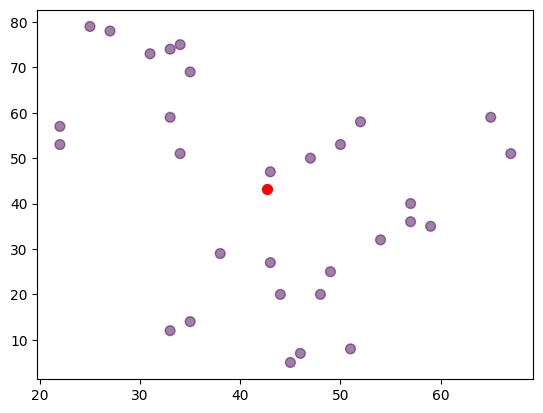

In [462]:
# -----------------------------------
# Import lib
# -----------------------------------
from pandas import DataFrame
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


# -----------------------------------
# Instance dataset
# -----------------------------------
Data = {'x': [25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,59,52,65,47,49,48,35,33,44,45,38,43,51,46],
        'y': [79,51,53,78,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,25,20,14,12,20,5,29,27,8,7]
       }
  
df = DataFrame(Data,columns=['x','y'])

# -----------------------------------
# Kmeans
# -----------------------------------
kmeans = KMeans(n_clusters=1).fit(df)
centroids = kmeans.cluster_centers_
print(" My centroid coordinates :")
print(centroids) 

# -----------------------------------
# Plot
# -----------------------------------
plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

Now, I want 3 centroids, instead of one :

 My multiples centroids coordinates :
[[43.2 16.7]
 [29.6 66.8]
 [55.1 46.1]]


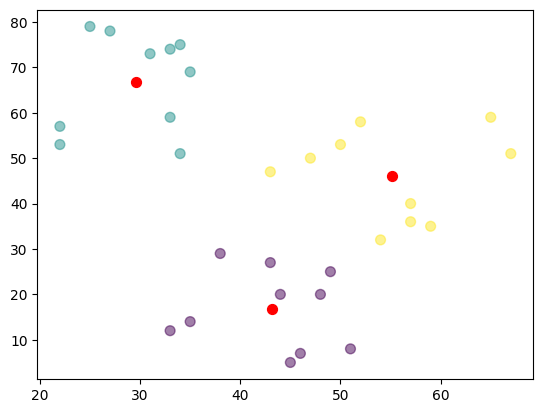

In [463]:
# -----------------------------------
# Kmeans
# -----------------------------------
kmeans = KMeans(n_clusters=3).fit(df)
centroids = kmeans.cluster_centers_
print(" My multiples centroids coordinates :")
print(centroids) 

# -----------------------------------
# Plot
# -----------------------------------
plt.scatter(df['x'], df['y'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

Ok, so now that I have used SkLearn, what if I want to use the pulp modeler instead ?

Edit: There is a code using Gurobi there : https://github.com/Jeevesh28/Facility-Location-Problem/blob/main/UFLP%20(with%20and%20without%20Disruptions).ipynb

and 

https://medium.com/operations-research-bit/solving-p-center-problem-using-pulp-and-python-db87b54a6711

<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

In [464]:
# comin soon

# <b>20.6 Instance - Taïwan university minimum facility location </b>

Link : https://www.coursera.org/learn/operations-research-modeling/lecture/gAB39/3-5-facility-location-covering

I have 4 demands points, and 3 facility locations, the incidences are pictured below, how to minimize the number of facility locations ? (Hint, obviously, the facility location 1 is useless to cover all of the demands)
<table>
  <tr>
    <th><b>Demands (Circle)</b></th>
    <th>D1</th>
    <th>D2</th>
    <th>D3</th>
    <th>D4</th>

  </tr>
  <tr>
    <td>Locations (Square)</td>
    <td>L1</td>
    <td>L2</td>
    <td>L3</td>

  </tr>   
</table> 


<div style="text-align:center">
<img src="img/cfl.png"></img>
</div>


## 20.7 Math model

In chapter 10, I have used the wikipedia set cover maths model, but the one that is written without the incidence matrix (Read wikipedia), however, my python pulp code has an incidence matrix.:<br>
Source : [Wikipedia Set Cover](https://en.wikipedia.org/wiki/Set_cover_problem)

$$
Min (S) = \sum_{s ∈ S} x_{j}
$$
$$
s.t
$$
$$
 \sum_{s:e ∈ S} x_{j} >= 1 \thinspace ∀ \thinspace  e \in U
$$
$$
x_{j} \in \{0,1\} \thinspace ∀ \thinspace x_{j}  \in S
$$

$$
where
$$

$$
 x_{j} = set \thinspace selection
$$
$$
 e = element \thinspace of \thinspace the \thinspace U \thinspace set
$$
$$
 S = set \thinspace ensemble
$$
$$
 U = universe \thinspace of \thinspace elements
$$



Let's rewrite the Coursera math model and compare it to the wikipedia one that we already saw in chapter 10:

$$
Min  \sum_{j ∈ J} x_{j}
$$
$$
subject \thinspace to 
$$
$$
 \sum_{j ∈ J} a_{ij}.x_{j} >= 1 \thinspace ∀ \thinspace  i \in I
$$
$$
x_{j} \in \{0,1\} \thinspace ∀ \thinspace j  \in J
$$

$$
where
$$

$$
 x_{j} = set \thinspace selection
$$
$$
 a_{ij} = incidence
$$
$$
 J = set \thinspace of \thinspace locations
$$
$$
 I = set \thinspace of \thinspace demands
$$
$$
 X = set \thinspace of \thinspace incidences
$$

I do notice that I the Coursera math model, the aij notation is used.

Now, let's focus on the coursera math model version, 
Let's describe the sets, according to the coursera course, now :

- I = {D1,D2,D3,D4}                -> set of demands<br>
- J = {L1,L2,L3}                      -> set of locations<br>
- matrix = {L1:(1,2),L2:(1,2,3),L3:(2,4)}  -> sets of incidences<br>



## 20.8 Python Pulp solution
<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

Ok, first, I'm using the wikipedia math model here, because it's the unweighted facility location version, and I will make sure solution is good by adding 2 extensions to the instance.

<b>I will consider each location as a "set" there, then, I will minimize the number of sets.</b>


In [465]:

from pulp import *

# -----------------------------------
# Instance
# -----------------------------------
 
S = ["S1","S2","S3"] # sets ensemble

# incidence matrix - sets internal description
           # S1,S2,S3
matrix = [  [1,1,0], # e1
            [1,1,1], # e2
            [0,1,0], # e3
            [0,0,1], # e4

        ]

# -----------------------------------
# Type of problem
# -----------------------------------
Problem = LpProblem('minimal_cover_sets',LpMinimize)

# -----------------------------------
# Decisions variables
# -----------------------------------
x = LpVariable.dicts("SET", S, 0, None, LpBinary) # Transforming sets to decisions variables

# -----------------------------------
# Math model
# -----------------------------------

# Objective function
# Minimizing sum of sets
Problem += lpSum(x[j] for j in S) # It clearly looks like the wikipedia math model


# Constraint
for j in matrix: # For each matrix line
    Problem += lpSum(j[idx] * x[i] for idx,i in enumerate(S)) >= 1 # Summing sets is >= to 1 for each elements of U ( Wikipedia math model)

# -----------------------------------
# Solution
# -----------------------------------
# print(Problem)

Problem.solve()

print('Minimized number of sets (locations) = ', value(Problem.objective))
 
for i in Problem.variables():
    print('SELECTED SET-LOCATION:',i.name, '=', i.varValue)

Minimized number of sets (locations) =  2.0
SELECTED SET-LOCATION: SET_S1 = 0.0
SELECTED SET-LOCATION: SET_S2 = 1.0
SELECTED SET-LOCATION: SET_S3 = 1.0


## 20.8 Minimum facility location extension 1

<div style="text-align:center">
<img src="img/cfl2.png"></img>
</div>

Here is the python pulp solution, It's ok. Squared Locations 1 and 3 are useless.

In [466]:

from pulp import *

# -----------------------------------
# Instance
# -----------------------------------
 
S = ["S1","S2","S3","S4"] # sets ensemble

# incidence matrix - sets internal description
           # S1,S2,S3,S4
matrix = [  [1,1,0,0], # e1
            [1,1,1,0], # e2
            [0,1,0,0], # e3
            [1,0,1,1], # e4
            [0,0,0,1], # e5

        ]

# -----------------------------------
# Type of problem
# -----------------------------------
Problem = LpProblem('minimal_cover_sets',LpMinimize)

# -----------------------------------
# Decisions variables
# -----------------------------------
x = LpVariable.dicts("SET", S, 0, None, LpBinary) # Transforming sets to decisions variables

# -----------------------------------
# Math model
# -----------------------------------

# Objective function
# Minimizing sum of sets
Problem += lpSum(x[j] for j in S) # It clearly looks like the wikipedia math model


# Constraint
for j in matrix: # For each matrix line
    Problem += lpSum(j[idx] * x[i] for idx,i in enumerate(S)) >= 1 # Summing sets is >= to 1 for each elements of U ( Wikipedia math model)

# -----------------------------------
# Solution
# -----------------------------------
# print(Problem)

Problem.solve()

print('Minimized number of sets (locations) = ', value(Problem.objective))
 
for i in Problem.variables():
    print('SELECTED SET-LOCATION:',i.name, '=', i.varValue)

Minimized number of sets (locations) =  2.0
SELECTED SET-LOCATION: SET_S1 = 0.0
SELECTED SET-LOCATION: SET_S2 = 1.0
SELECTED SET-LOCATION: SET_S3 = 0.0
SELECTED SET-LOCATION: SET_S4 = 1.0


## 20.9 Minimum facility location extension 2

<div style="text-align:center">
<img src="img/cfl3.png"></img>
</div>

Here is the python pulp solution, It's ok, squared location 2 is useless, but you can't eliminate the others ones.

In [467]:

from pulp import *

# -----------------------------------
# Instance
# -----------------------------------
 
S = ["S1","S2","S3","S4"] # sets ensemble

# incidence matrix - sets internal description
           # S1,S2,S3,S4
matrix = [  [1,1,0,0], # e1
            [1,1,1,0], # e2
            [0,0,1,0], # e3
            [1,0,1,1], # e4
            [0,0,0,1], # e5

        ]

# -----------------------------------
# Type of problem
# -----------------------------------
Problem = LpProblem('minimal_cover_sets',LpMinimize)

# -----------------------------------
# Decisions variables
# -----------------------------------
x = LpVariable.dicts("SET", S, 0, None, LpBinary) # Transforming sets to decisions variables

# -----------------------------------
# Math model
# -----------------------------------

# Objective function
# Minimizing sum of sets
Problem += lpSum(x[j] for j in S) # It clearly looks like the wikipedia math model


# Constraint
for j in matrix: # For each matrix line
    Problem += lpSum(j[idx] * x[i] for idx,i in enumerate(S)) >= 1 # Summing sets is >= to 1 for each elements of U present ( Wikipedia math model)


# -----------------------------------
# Solution
# -----------------------------------

Problem.solve()

print('Minimized number of sets (locations) = ', value(Problem.objective))
 
for i in Problem.variables():
    print('SELECTED SET-LOCATION:',i.name, '=', i.varValue)

Minimized number of sets (locations) =  3.0
SELECTED SET-LOCATION: SET_S1 = 1.0
SELECTED SET-LOCATION: SET_S2 = 0.0
SELECTED SET-LOCATION: SET_S3 = 1.0
SELECTED SET-LOCATION: SET_S4 = 1.0


# <b> 20.12 Instance - fixed charge facility location </b>


<div style="text-align:center">
<img src="img/1622201040316.jpg" width="600">
</div>

- We have 3 suppliers and 5 customers.
- We have customer demand: 80, 270, 250, 160, 180.
- We have the suppliers fixed installation costs and their maximum capacity.
- We have the transportation costs to each customer.

How to minimize the facility locations amount and transportations and fixed costs, subject to fullfill customers demands ?

Source : Unknown.


<div style="text-align:center">
<img src="img/capafacilocation.png" width="">
</div>


## <b> 20.13 Math model </b>

I first take a look at the wikipedia math model :
https://en.wikipedia.org/wiki/Optimal_facility_location


$$
Min \sum_{i=1}^{n} \sum_{j=1}^{m} c_{ij}.d_{j}.y_{ij} + \sum_{i=1}^{n} f_{i}.x_{i}
$$
$$
subject \thinspace to 
$$
$$
 \sum_{i=1}^{n} y_{ij} = 1 \thinspace ∀ \thinspace  j = 1....m
$$
$$
 \sum_{j=1}^{m} d_{j}.y{ij} <= u_{i}.x_{i} \thinspace ∀ \thinspace  i = 1....n
$$
$$
y_{ij} >= 0 \thinspace ∀ \thinspace i  = 1....n \thinspace and \thinspace j  = 1....m
$$
$$
x_{i} \in \{0,1\} \thinspace ∀ \thinspace i  = 1....n
$$

$$
where
$$

$$
 x_{i} = 
$$

I see that it's similar to the Cornell university mention one : 
https://optimization.cbe.cornell.edu/index.php?title=Facility_location_problem

## <b>20.14 Python Pulp solution</b>
<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

First, I am using this code, variables names does not match the math model, so I will add another version matching the wikipedia math model, to make sure everything is ok, then I will use the code on another known instance result, to check if result is good too.

In [468]:
from pulp import *

# -----------------------------------
# Instance
# -----------------------------------
Customer = [1,2,3,4,5]
Facility = ['Fac-1', 'Fac-2', 'Fac-3']
Demand = {1 : 80, 2 : 270, 3 : 250, 4 : 160, 5 : 180}
Max_Supply = {'Fac-1' : 500, 'Fac-2' : 500, 'Fac-3' : 500} 
fixed_cost = {'Fac-1' : 1000, 'Fac-2' : 1000, 'Fac-3' : 1000 }
transportation_cost = {'Fac-1' : {1 : 4, 2 : 5, 3 : 6, 4 : 8, 5 : 10},
                       'Fac-2' : {1 : 6, 2 : 4, 3 : 3, 4 : 5, 5 : 8},
                       'Fac-3' : {1 : 9, 2 : 7, 3 : 4, 4 : 3, 5 : 4}
                      }

# -----------------------------------
# Type of problem
# -----------------------------------
prob = LpProblem("Capacitated_Facility_Location_Problem", LpMinimize)

# -----------------------------------
# Decisions variables
# -----------------------------------
use_facility = LpVariable.dicts("Use Facility", Facility, 0, 1, LpBinary)
ser_customer = LpVariable.dicts("Service", [(i,j) for i in Customer for j in Facility], 0)

# -----------------------------------
# Math model
# -----------------------------------

# Objective
# We define the objective function: minimize the sum of the fixed costs and variable costs (transport costs)
prob += lpSum(fixed_cost[j]*use_facility[j] for j in Facility) + lpSum(transportation_cost[j][i]*ser_customer[(i,j)] for j in Facility for i in Customer)

# Constraints

# We must meet customer demand
for i in Customer:
    prob += lpSum(ser_customer[(i,j)] for j in Facility) == Demand[i]

# We cannot exceed the capacity of suppliers
for j in Facility:
    prob += lpSum(ser_customer[(i,j)] for i in Customer) <= Max_Supply[j]*use_facility[j]

# 
for i in Customer:
    for j in Facility:
        prob += ser_customer[(i,j)] <= Demand[i]*use_facility[j]


# -----------------------------------
# Solution
# -----------------------------------
prob.solve()

print("Solution Status = ", LpStatus[prob.status])
# Print the solution of Binary Decision Variables
Tolerance = 0.0001
for j in Facility:
    if use_facility[j].varValue > Tolerance:
        print("Create facility at place = ", j)

# Priting continuous variables
for v in prob.variables():
    print(v.name, "=", v.varValue)


# Minimized total cost
print("Cost = ", value(prob.objective))

Solution Status =  Optimal
Create facility at place =  Fac-2
Create facility at place =  Fac-3
Service_(1,_'Fac_1') = 0.0
Service_(1,_'Fac_2') = 80.0
Service_(1,_'Fac_3') = 0.0
Service_(2,_'Fac_1') = 0.0
Service_(2,_'Fac_2') = 270.0
Service_(2,_'Fac_3') = 0.0
Service_(3,_'Fac_1') = 0.0
Service_(3,_'Fac_2') = 150.0
Service_(3,_'Fac_3') = 100.0
Service_(4,_'Fac_1') = 0.0
Service_(4,_'Fac_2') = 0.0
Service_(4,_'Fac_3') = 160.0
Service_(5,_'Fac_1') = 0.0
Service_(5,_'Fac_2') = 0.0
Service_(5,_'Fac_3') = 180.0
Use_Facility_Fac_1 = 0.0
Use_Facility_Fac_2 = 1.0
Use_Facility_Fac_3 = 1.0
Cost =  5610.0


# <b> 20.15 Instance - facility location picking and profit maximization</b>

<div style="text-align:center">
<img src="img/facilityintro.jpg" width="600" >
</div>

Suppose a paper products manufacturer has enough capital to build and manage an additional manufacturing plant in the United States in order to meet increased demand in three cities: New York City, NY, Los Angeles, CA, and Topeka, KS. The company already has distribution facilities in Denver, CO, Seattle, WA, and St. Louis, MO, and due to limited capital, cannot build an additional distribution facility. So, they must choose to build their new plant in one of these three locations. Due to geographic constraints, plants in Denver, Seattle, and St. Louis would have a maximum operating capacity of 400 tons/day, 700 tons/day, and 600 tons/day, respectively. The cost of transporting the products from the plant to the city is directly proportional, and an outline of the supply, demand, and cost of transportation is shown in the figure below. Regardless of where the plant is built, the selling price of the product is $100/ton. 

Read more : https://optimization.cbe.cornell.edu/index.php?title=Facility_location_problem



<div style="text-align:center">
<img src="img/cornellfl.png" >
</div>

## <b> 23.2 Maths model (Compact model)</b>
Cornell University Instance (No fixed costs)
<div style="text-align:center">
<img src="img/capacited transport1.png" >
</div>
<div style="text-align:center">
<img src="img/capacitedtransport2.png" >
</div>



## <b> 23.3 Python pulp solution (Hard coded)</b>
<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

Please notice that they say that the math model need to be executed on 3 factories, to pick the most advantageous one, well, ok, let's do it 

Let :
- Set of factories : {F1,F2,F3}
- Set of customers : {C1,C2,C3}

Thus, <b>xij</b> becomes an <b>association</b> of one factory x and one customer j , for exemple F1C1, and becomes <b>a decision variable</b>, this is what I mean by "hard coding" the optimization.


<b> Executing their math model for the Denver factory :</b>

In [469]:
from pulp import *

# -----------------------------------
# Type of problem
# -----------------------------------
prob = LpProblem("Facility_Location_Picking_Problem", LpMaximize)

# -----------------------------------
# Decisions variables
# -----------------------------------
F1C1 = pulp.LpVariable('F1C1', lowBound=0, cat='Continuous') # Amount sent from Factory 1 to Customer 1 expressed in tons
F1C2 = pulp.LpVariable('F1C2', lowBound=0, cat='Continuous') # Amount sent from Factory 1 to Customer 2 expressed in tons
F1C3 = pulp.LpVariable('F1C3', lowBound=0, cat='Continuous') # Amount sent from Factory 1 to Customer 3 expressed in tons

# -----------------------------------
# Math model
# -----------------------------------

# Objective
prob += F1C1 * (100 - 10) + F1C2 * (100 - 5) + F1C3 * (100 - 17) 

# Constraints

# Max operating by factory
prob += F1C1 + F1C2 + F1C3 <= 400

# Max demand per customers
prob += F1C1  <= 300
prob += F1C2  <= 100
prob += F1C3 <= 500

# -----------------------------------
# Solution
# -----------------------------------
# print(prob) Debug
prob.solve()

print('Maximized profit sales = ', value(prob.objective))
 
for i in prob.variables():
    print('Tons sent:',i.name, '=', i.varValue)

Maximized profit sales =  36500.0
Tons sent: F1C1 = 300.0
Tons sent: F1C2 = 100.0
Tons sent: F1C3 = 0.0


<b>Seattle factory</b>

In [470]:
from pulp import *

# -----------------------------------
# Type of problem
# -----------------------------------
prob = LpProblem("Facility_Location_Picking_Problem", LpMaximize)

# -----------------------------------
# Decisions variables
# -----------------------------------
F2C1 = pulp.LpVariable('F2C1', lowBound=0, cat='Integer')
F2C2 = pulp.LpVariable('F2C2', lowBound=0, cat='Integer')
F2C3 = pulp.LpVariable('F2C3', lowBound=0, cat='Integer')

# -----------------------------------
# Math model
# -----------------------------------

# Objective
prob +=  F2C1 * (100 - 11) + F2C2 * (100 - 18) + F2C3 * (100 - 28) 

# Constraints

# Max operating by factory
prob += F2C1 + F2C2 + F2C3 <= 700

# Max demand per customers
prob += F2C1 <= 300
prob += F2C2 <= 100
prob += F2C3 <= 500

# -----------------------------------
# Solution
# -----------------------------------
# print(prob) Debug
prob.solve()

print('Maximized profit sales = ', value(prob.objective))
 
for i in prob.variables():
    print('Tons sent:',i.name, '=', i.varValue)

Maximized profit sales =  56500.0
Tons sent: F2C1 = 300.0
Tons sent: F2C2 = 100.0
Tons sent: F2C3 = 300.0


<b> Saint Louis factory</b>

In [471]:
from pulp import *

# -----------------------------------
# Type of problem
# -----------------------------------
prob = LpProblem("Facility_Location_Picking_Problem", LpMaximize)

# -----------------------------------
# Decisions variables
# -----------------------------------
F3C1 = pulp.LpVariable('F3C1', lowBound=0, cat='Integer')
F3C2 = pulp.LpVariable('F3C2', lowBound=0, cat='Integer')
F3C3 = pulp.LpVariable('F3C3', lowBound=0, cat='Integer')

# -----------------------------------
# Math model
# -----------------------------------

# Objective
prob += F3C1 * (100 - 18 ) + F3C2 * (100 - 3) + F3C3 * (100 - 9)

# Constraints

# Max operating by factory
prob += F3C1 + F3C2 + F3C3 <= 600

# Max demand per customers
prob += F3C1 <= 300
prob += F3C2 <= 100
prob += F3C3 <= 500

# -----------------------------------
# Solution
# -----------------------------------
# print(prob) Debug
prob.solve()

print('Maximized profit sales = ', value(prob.objective))
 
for i in prob.variables():
    print('Tons sent:',i.name, '=', i.varValue)

Maximized profit sales =  55200.0
Tons sent: F3C1 = 0.0
Tons sent: F3C2 = 100.0
Tons sent: F3C3 = 500.0


We see that the python pulp solution is the same than the Cornell university Gams one, looking good, bro.

<div style="text-align:center">
<img src="img/thumbs-up.jpg" width="100">
</div>

Here is a screen cap :

<div style="text-align:center">
<img src="img/pickingfactory.png" >
</div>

# Comin soon : new case

In [472]:
from pulp import *

TYPES = ["warehouse","factory"] #i
CITIES = ["bolu","sivas"] #j

p = {"warehouse":{"bolu":1,"sivas":2},"factory":{"bolu":3,"sivas":2}}
c = {"warehouse":{"bolu":5,"sivas":2},"factory":{"bolu":6,"sivas":3}}

model = LpProblem("Profit_Maximization",LpMaximize)

X = LpVariable.dicts("",[(i,j) for i in TYPES for j in CITIES],0, 1, cat = "Binary")

model += lpSum(lpSum([[X[(i,j)]*p[i][j] for j in CITIES] for i in TYPES]))

model += lpSum([X[("warehouse",j)] for j in CITIES])<=1

model += lpSum(lpSum([[c[i][j]*X[(i,j)] for j in CITIES] for i in TYPES])) <= 10
               
for j in CITIES:

    model += X[("factory",j)] >= X[("warehouse",j)]

# print(model)
status = model.solve()
# status = LpStatus[status]

print("Values for opening a wirehouse in bolu,sivas and opening a factory in bolu,sivas given below respectively.")
print([X[(i,j)]for i in TYPES for j in CITIES], [X[(i,j)].varValue for i in TYPES for j in CITIES])
print("PROFIT: ", value(model.objective),"Million")
# print(status)

print('Minimized number of sets (locations) = ', value(model.objective))
 
for i in model.variables():
    print('SELECTED SET-LOCATION:',i.name, '=', i.varValue)

Values for opening a wirehouse in bolu,sivas and opening a factory in bolu,sivas given below respectively.
[_('warehouse',_'bolu'), _('warehouse',_'sivas'), _('factory',_'bolu'), _('factory',_'sivas')] [0.0, 0.0, 1.0, 1.0]
PROFIT:  5.0 Million
Minimized number of sets (locations) =  5.0
SELECTED SET-LOCATION: _('factory',_'bolu') = 1.0
SELECTED SET-LOCATION: _('factory',_'sivas') = 1.0
SELECTED SET-LOCATION: _('warehouse',_'bolu') = 0.0
SELECTED SET-LOCATION: _('warehouse',_'sivas') = 0.0


#  <b> 21. Modeling of a single machine scheduling problem</b>

# <b>21.1 Single machine, parallels ,flow shop and job shop differences.</b>

- Single Machine:

<div style="text-align:center">
<img src="img/ordonnancement/Machine_unique_Ordonnant.JPEG">
</div>

- Parrallels machines:

<div style="text-align:center">
<img src="img/ordonnancement/Machine_Parallèles_Ordonnancement.JPEG">
</div>

- Unique path workshop (Flow Shop):

<div style="text-align:center">
<img src="img/ordonnancement/Flow_Shop_Ordonnancement.JPEG">
</div>

- Multiple route workshops (Job Shop):

<div style="text-align:center">
<img src="img/ordonnancement/Job_Shop_Ordonnancement.JPEG">
</div>



## <b> 21.2 Single Machine scheduling instance</b>

<div style="text-align:center">
<img src="img/singlemachine.jpg" width="500">
</div>

- I have 1 machine and 3 jobs to do on it.
- The jobs last 2 and 5 and 6 hours respectively.
- The jobs must be delivered at 3:00 PM, 9:00 AM, and 11:00 AM, respectively.
How can I avoid being late?

## <b> 21.3 Math model</b>

Comin' soon

## <b> 21.4 Handy try out</b>

Here is a first try by hand : Unfortunatly, job 3 is late and only delivered at 13:00 A.M instead of 11:00 A.M
<table>
  <tr>
    <th><b>Hours</b></th>
    <th>1</th>
    <th>2</th>
    <th>3</th>
    <th>4</th>
    <th>5</th>
    <th>6</th>
    <th>7</th>
    <th>8</th>
    <th>9</th>
    <th>10</th>
    <th>11</th>
    <th>12</th>
    <th>13</th>
  </tr>
   <tr>
    <th><b>Job 1</b></th>
    <th>-</th>
    <th>-</th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
   
  </tr>
  <tr>
    <th><b>Job 2</b></th>
    <th></th>
    <th></th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
   
  </tr>
    <tr>
    <th><b>Job 3</b></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>

  </tr>
 
   
</table> 

This second try out is ok , Job 1 gets delivered before 3:00 PM, Job 2 gets delivered before 9:00 AM, and Job 3 gets delivered before 11:00 AM: 
<table>
  <tr>
    <th><b>Hours</b></th>
    <th>1</th>
    <th>2</th>
    <th>3</th>
    <th>4</th>
    <th>5</th>
    <th>6</th>
    <th>7</th>
    <th>8</th>
    <th>9</th>
    <th>10</th>
    <th>11</th>
    <th>12</th>
    <th>13</th>
  </tr>
   <tr>
    <th><b>Job 1</b></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th>-</th>
    <th>-</th>
   
  </tr>
  <tr>
    <th><b>Job 2</b></th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
   
  </tr>
    <tr>
    <th><b>Job 3</b></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th></th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th>-</th>
    <th></th>
    <th></th>

  </tr>
 
   
</table>


## <b> 21.5 Itertools solution</b>

crédit : Tim Roberts - StackOverflow

In [473]:

import itertools

# We inform the name of each task, its duration, and its time due.
tasks = [("job1", 2, 15), ("job2", 5, 9), ("job3", 6,11)]

# For each permutation
for tasklist in itertools.permutations(tasks):
    time = 1
    start = []
    order = []
    for task in tasklist:
        start.append( time )
        order.append( task )
        time += task[1]
        if time-1 > task[2]:
            # We violated a due date constraint.
            break
    else:
        print("Order to apply",order,"success")

Order to apply [('job2', 5, 9), ('job3', 6, 11), ('job1', 2, 15)] success


#  <b> 22. Modeling of a parallels machines jobs costs assignment minimization</b>

# <b>23. Modeling an uncapacited transport problem </b>

## <b>23.1 Instance</b>

In this first example, we minimize only the total distance and we ask Pulp to select 5 roads , and to minimize the total distance between factories and stores, we use binary decision variables. Solution is obvious, looking at the drawing :
<div style="text-align:center">
<img src="img/uncapacited2.jpg"></img>
</div>

## <b>23.2 Math model</b>

Considering an <b>xij</b> notation, i is being the factory, j being a store.
Then, xij is an association of both.
Let 
- F = set of factories {A,B}
- S = set of stores {1,2,3,4,5}
- d = distance matrix

Then, for example, xB3 becomes a decision variable , otherly said x , indiced by the i and j association of indices.

Let's now build the math model :

$$
Min  \sum_{i ∈ F} \sum_{j ∈ C} d_{ij}.x_{ij} 
$$
$$
subject \thinspace to 
$$
$$
 \sum_{j ∈ C} x_{ij} >= maxRoads \thinspace ∀ \thinspace i  \in F
$$
$$
x_{ij} \in \{0,1\} ∀ \thinspace i \in F and \thinspace  ∀ \thinspace j \in S
$$

$$
where
$$

$$
 x_{ij} = association \thinspace between \thinspace a \thinspace i \thinspace factory \thinspace and \thinspace a \thinspace j \thinspace store
$$
$$
 d_{ij} = distance \thinspace between \thinspace a \thinspace i \thinspace factory \thinspace and \thinspace a \thinspace j \thinspace store
$$
$$
 F = set \thinspace of \thinspace factories
$$
$$
 C = set \thinspace of \thinspace stores
$$
$$
 d = distance \thinspace matrix
$$



## <b> 23.3 Python pulp solution (Hard coded)</b>
<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>


In [474]:
from pulp import *
 
# -----------------------------------
# Decisions variables
# -----------------------------------
XA1 = LpVariable('XA1', lowBound=0, cat='Binary') # Road from factory A to store 1
XA2 = LpVariable('XA2', lowBound=0, cat='Binary')
XA3 = LpVariable('XA3', lowBound=0, cat='Binary')
XA4 = LpVariable('XA4', lowBound=0, cat='Binary')
XA5 = LpVariable('XA5', lowBound=0, cat='Binary')
XB1 = LpVariable('XB1', lowBound=0, cat='Binary')
XB2 = LpVariable('XB2', lowBound=0, cat='Binary')
XB3 = LpVariable('XB3', lowBound=0, cat='Binary')
XB4 = LpVariable('XB4', lowBound=0, cat='Binary')
XB5 = LpVariable('XB5', lowBound=0, cat='Binary')
 
# -----------------------------------
# Type of problem
# -----------------------------------
Problem = LpProblem('transport_optimization',LpMinimize)
 
# -----------------------------------
# Maths model
# -----------------------------------

# Objective
Problem += 3*XA1 + 1*XA2 + 3*XA3 + 2*XA4 + 9*XA5 + 25*XB1 + 15*XB2 + 32*XB3 + 22*XB4 + 8*XB5
 
# Constraints
# We want at least 5 routes to the 5 stores.
Problem += (XA1 + XA2 + XA3 + XA4 + XA5 + XB1 + XB2 + XB3 + XB4 + XB5) >= 5
 
# -----------------------------------
# Solution
# -----------------------------------
Problem.solve()
print('Statut:', LpStatus[Problem.status])
print('Total minimized distance = ', value(Problem.objective))
 
for i in Problem.variables():
    if i.varValue > 0:
        print('Picked road :',i.name, '=', i.varValue)

Statut: Optimal
Total minimized distance =  17.0
Picked road : XA1 = 1.0
Picked road : XA2 = 1.0
Picked road : XA3 = 1.0
Picked road : XA4 = 1.0
Picked road : XB5 = 1.0


## <b> 23.4 Python pulp solution (Compact solution  )</b>
<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

In [475]:
from pulp import *
 
# -----------------------------------
# Instance
# -----------------------------------
F = [A,B]
S = [1,2,3,4,5]
d = [ 
    [3,1,3,2,9],
    [25,15,32,22,8]
]
maxRoads = 5

# -----------------------------------
# Type of problem
# -----------------------------------
Problem = LpProblem('transport_optimization',LpMinimize)

# -----------------------------------
# Decisions variables
# -----------------------------------

 # Create a list of all possibilities, the goal is to recreate each xij possibilities, faster than typing it by hand
routes = [(f, s) for f in F  for s in S]

# Create decisions variables list, each xij possibilities
x = LpVariable.dicts("Route", (F , S), 0, None, LpBinary)

# Create a distance directory
d = makeDict([F,S], d, 0)

# -----------------------------------
# Maths model
# -----------------------------------
# Objective function
Problem += lpSum([d[i][j]  * x[i][j]  for (i, j) in routes]) # Looks like the math model

# Constraints
Problem += lpSum([x[i][j]  for (i, j) in routes]) >= maxRoads # Looks like the math model

# -----------------------------------
# Solution
# -----------------------------------
Problem.solve()
print('Statut:', LpStatus[Problem.status])
print('Total minimized distance = ', value(Problem.objective))
 
for i in Problem.variables():
    if i.varValue > 0:
        print('Picked road :',i.name, '=', i.varValue)

Statut: Optimal
Total minimized distance =  17.0
Picked road : Route_A_1 = 1.0
Picked road : Route_A_2 = 1.0
Picked road : Route_A_3 = 1.0
Picked road : Route_A_4 = 1.0
Picked road : Route_B_5 = 1.0


# <b> 24. Instance -  modeling of a fixed charge transport optimization</b>

## <b>24.1 Instance</b>
I have 2 factories A and B which build the same object, their production capacity is 1000 and 4000,

I have 5 stores, which have a request of 500,900,1800,200,700.Total demand is therefore 4100.

The cost of each road from a factory to a store is:

In [476]:
# Stores        1  2  3  4  5
# Costs         2, 4, 5, 2, 1  # A   Factories
# Costs         3, 1, 3, 2, 3  # B

<div style="text-align:center">
<img src="img/transport2.png">
</div>

What deliveries to minimize the overall transport cost?

## <b> 24.2 Math model</b>
<img src="img/transport_mdl.png"></img>


## <b> 24.3 Python pulp solution (Hard coded)</b>
<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

In [477]:
from pulp import *
 
# -----------------------------------
# Decisions variables
# -----------------------------------
XA1 = LpVariable('XA1', lowBound=0, cat='Integer') # From factory A to store 1
XA2 = LpVariable('XA2', lowBound=0, cat='Integer')
XA3 = LpVariable('XA3', lowBound=0, cat='Integer')
XA4 = LpVariable('XA4', lowBound=0, cat='Integer')
XA5 = LpVariable('XA5', lowBound=0, cat='Integer')
XB1 = LpVariable('XB1', lowBound=0, cat='Integer')
XB2 = LpVariable('XB2', lowBound=0, cat='Integer')
XB3 = LpVariable('XB3', lowBound=0, cat='Integer')
XB4 = LpVariable('XB4', lowBound=0, cat='Integer')
XB5 = LpVariable('XB5', lowBound=0, cat='Integer')
 
# -----------------------------------
# Type of problem
# -----------------------------------
Problem = LpProblem('optimisation_transport',LpMinimize)
 
# -----------------------------------
# Math model
# -----------------------------------
# The objective function is to minimize the overall transport cost, taking into account each road.
Problem += 2*XA1 + 4*XA2 + 5*XA3 + 2*XA4 + 1*XA5 + 3*XB1 + 1*XB2 + 3*XB3 + 2*XB4 + 3*XB5
 
# Constraints

# Supply
# Factory A capacity
Problem += XA1 + XA2 + XA3 + XA4 + XA5 <= 1000
# Factory B capacity
Problem += XB1 + XB2 + XB3 + XB4 + XB5 <= 4000

# Demand
# Store demand 1 
Problem += XA1 + XB1 >= 500
# Store demand 2
Problem += XA2 + XB2 >= 900
# Store demand 3
Problem += XA3 + XB3 >= 1800
# Store demand 4
Problem += XA4 + XB4 >= 200
# Store demand 5
Problem += XA5 + XB5 >= 700

# -----------------------------------
# Solution
# -----------------------------------
Problem.solve()

print('Statut:', LpStatus[Problem.status])
print('Minimized total cost = ', value(Problem.objective))
 
for i in Problem.variables():
    if i.varValue > 0:
        print('Picked route :',i.name, '=', i.varValue)

Statut: Optimal
Minimized total cost =  8600.0
Picked route : XA1 = 300.0
Picked route : XA5 = 700.0
Picked route : XB1 = 200.0
Picked route : XB2 = 900.0
Picked route : XB3 = 1800.0
Picked route : XB4 = 200.0


## <b> 24.4 Python pulp solution (Compact model)</b>
<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

Now, I am rewriting the pulp code, strictly like in the Daskin math model.

In [478]:
from pulp import *

# -----------------------------------
# Instance , strictly written like in the DASKIN math model
# -----------------------------------

# Factories
I = ["A", "B"]

# Supply
S = {"A": 1000, "B": 4000}

# Stores
J = ["1", "2", "3", "4", "5"]

# Demand
D = {
"1": 500,
"2": 900,
"3": 1800,
"4": 200,
"5": 700,
}

# Road Costs
cost_matrix = [  
# Store   # 1  2  3  4  5
        [2, 4, 5, 2, 1],  # A   Factories
        [3, 1, 3, 2, 3],  # B
     ]

# -----------------------------------
# Type of problem
# -----------------------------------
# We want to minimize the overall transport cost, we create our problem
prob = LpProblem("Distribution_Problem", LpMinimize)


# -----------------------------------
# Decision variables
# -----------------------------------
  
# We transform costs into a dictionary - https://stackoverflow.com/questions/44527562/how-to-create-a-3-dimensional-dictionary-from-3-lists-in-python
c = makeDict([I, J], cost_matrix, 0)

# Creates a list of tuples containing all the possible routes for transport
Routes = [(i, j) for i in I for j in J]

# A dictionary called 'Vars' is created to contain the referenced variables(the routes)
x = LpVariable.dicts("Route", (I, J), 0, None, LpInteger)

# -----------------------------------
# Math model
# -----------------------------------

# Objective function
prob += (lpSum([c[i][j] * x[i][j] for (i, j) in Routes]),"transport_cost_sum",) # Like the Daskin math model

# The capacity maximum constraints are added to prob for each capacity node
for i in I:
    prob += (lpSum([x[i][j] for j in J]) <= S[i])

# The demand minimum constraints are added to prob for each demand node 
for j in J:
    prob += (lpSum([x[i][j] for i in I]) >= D[j])

# -----------------------------------
# Solution
# -----------------------------------

prob.solve()
print ("Status:",LpStatus [prob.status])
for i in prob.variables():
    if i.varValue > 0:
        print('Picked road :',i.name, '=', i.varValue)

# The optimised objective function value is printed to the screen
print ("Total minimized cost : ", value (prob.objective))


Status: Optimal
Picked road : Route_A_1 = 300.0
Picked road : Route_A_5 = 700.0
Picked road : Route_B_1 = 200.0
Picked road : Route_B_2 = 900.0
Picked road : Route_B_3 = 1800.0
Picked road : Route_B_4 = 200.0
Total minimized cost :  8600.0


## <b> 24.5 Gurobi solution (Compact model)</b>

I see that the Gurobi solution is the same than the Pulp one.

In [479]:
import gurobipy as gp
from gurobipy import GRB
try:

# -----------------------------------
# Instance 
# -----------------------------------
    factories = ['A','B']

    stores = ['1','2','3','4','5']

    cost = {
        ('A','1'): 2,
        ('A','2'): 4,
        ('A','3'): 5,
        ('A','4'): 2,
        ('A','5'): 1,
        ('B','1'): 3,
        ('B','2'): 1,
        ('B','3'): 3,
        ('B','4'): 2,
        ('B','5'): 3
    }

    supply = {
        ('A'): 1000,
        ('B'): 4000
    }

    demand = {
        ('1'): 500,
        ('2'): 900,
        ('3'): 1800,
        ('4'): 200,
        ('5'): 700,

    }

# -----------------------------------
# Type of problem
# -----------------------------------
    m = gp.Model("transport_problem_1")

# -----------------------------------
# Decision variables
# -----------------------------------
    # Create variables
    flow = {}
    for f in factories:
        for s in stores:
            flow[f,s] = m.addVar(obj=cost[f,s], name='flow_%s_%s' % (f, s))

    # Integrate new variables
    m.update()

# -----------------------------------
# Math model
# -----------------------------------
    # Add supply constraints
    for f in factories:
        m.addConstr(gp.quicksum(flow[f,s] for s in stores) <= supply[f], 'supply_%s' % (f))
    
    # Add demand constraints
    for s in stores:
        m.addConstr(gp.quicksum(flow[f,s] for f in factories) >= demand[s], 'demand_%s' % (s))

# -----------------------------------
# SOlution 
# -----------------------------------

    # Optimize the model. The default ModelSense is to is to minimize the objective, which is what we want.
    m.optimize()

    # Print solution
    if m.status == GRB.status.OPTIMAL:
        print ('\nOptimal flows :')
        for f in factories:
            for s in stores:
                print (f, '->', s, ':', flow[f,s].x)

except gp.GurobiError:
    print ('Error reported')

Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (win64 - Windows 11.0 (22621.2))

CPU model: AMD Ryzen 3 5300U with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 7 rows, 10 columns and 20 nonzeros
Model fingerprint: 0x39505a07
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 5e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [2e+02, 4e+03]
Presolve removed 1 rows and 1 columns
Presolve time: 0.01s
Presolved: 6 rows, 9 columns, 18 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    5.4000000e+03   2.875000e+02   0.000000e+00      0s
       6    8.6000000e+03   0.000000e+00   0.000000e+00      0s

Solved in 6 iterations and 0.02 seconds (0.00 work units)
Optimal objective  8.600000000e+03

Optimal flows :
A -> 1 : 300.0
A -> 2 : 0.0
A -> 3 : 0.0
A -> 4 : 0.0
A -> 5 : 700.0
B -> 1 : 200.0
B -> 2 : 900.0
B -> 3

# <b> 24.5 Instance - Cornell university capacited transport profit maximization</b>

Suppose a paper products manufacturer has enough capital to build and manage an additional manufacturing plant in the United States in order to meet increased demand in three cities: New York City, NY, Los Angeles, CA, and Topeka, KS. The company already has distribution facilities in Denver, CO, Seattle, WA, and St. Louis, MO, and due to limited capital, cannot build an additional distribution facility. So, they must choose to build their new plant in one of these three locations. Due to geographic constraints, plants in Denver, Seattle, and St. Louis would have a maximum operating capacity of 400 tons/day, 700 tons/day, and 600 tons/day, respectively. The cost of transporting the products from the plant to the city is directly proportional, and an outline of the supply, demand, and cost of transportation is shown in the figure below. Regardless of where the plant is built, the selling price of the product is $100/ton. 

Read more : https://optimization.cbe.cornell.edu/index.php?title=Facility_location_problem

## <b> 24.6 Maths model (Compact model)</b>
Cornell University Instance (No fixed costs)
<div style="text-align:center">
<img src="img/capacited transport1.png" >
</div>
<div style="text-align:center">
<img src="img/capacitedtransport2.png" >
</div>



## <b> 24.7 Python pulp solution (Hard coded)</b>
<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

For a better understanding, I will hard code the math model, then, I will code the compact model just after to show the difference.

- Set of factories : {F1,F2,F3}
- Set of customers : {C1,C2,C3}

Thus, <b>xij</b> becomes an <b>association</b> of one factory x and one customer j , for exemple F1C1, and becomes <b>a decision variable</b>.

This model will pick the best routes, considering routes costs, for maximizing profits, It won't pick a factory, otherwize, I need to restart it 3 times, like what they say in the Cornell paper. But their math model is cool.

## <b>23.4 Python Pulp solution ( hard coded )</b>
<div style="text-align:center">
<img src="img/small-pulp.png" width="100">
</div>

In [480]:
from pulp import *

# -----------------------------------
# Type of problem
# -----------------------------------
prob = LpProblem("Facility_Location_Problem", LpMaximize)

# -----------------------------------
# Decisions variables
# -----------------------------------
F1C1 = pulp.LpVariable('F1C1', lowBound=0, cat='Integer') # Amount sent from Factory 1 to Customer 1 expressed in tons
F1C2 = pulp.LpVariable('F1C2', lowBound=0, cat='Integer') # Amount sent from Factory 1 to Customer 2 expressed in tons
F1C3 = pulp.LpVariable('F1C3', lowBound=0, cat='Integer')
F2C1 = pulp.LpVariable('F2C1', lowBound=0, cat='Integer')
F2C2 = pulp.LpVariable('F2C2', lowBound=0, cat='Integer')
F2C3 = pulp.LpVariable('F2C3', lowBound=0, cat='Integer')
F3C1 = pulp.LpVariable('F3C1', lowBound=0, cat='Integer')
F3C2 = pulp.LpVariable('F3C2', lowBound=0, cat='Integer')
F3C3 = pulp.LpVariable('F3C3', lowBound=0, cat='Integer')

# -----------------------------------
# Math model
# -----------------------------------

# Objective
prob += F1C1 * (100 - 10) + F1C2 * (100 - 5) + F1C3 * (100 - 17) + F2C1 * (100 - 11) + F2C2 * (100 - 18) + F2C3 * (100 - 28) + F3C1 * (100 - 18 ) + F3C2 * (100 - 3) + F3C3 * (100 - 9)

# Constraints

# Max operating by factory
prob += F1C1 + F1C2 + F1C3 <= 400
prob += F2C1 + F2C2 + F2C3 <= 700
prob += F3C1 + F3C2 + F3C3 <= 600

# Max demand per customers
prob += F1C1 + F2C1 + F3C1 <= 300
prob += F1C2 + F2C2 + F3C2 <= 100
prob += F1C3 + F2C3 + F3C3 <= 500

# -----------------------------------
# Solution
# -----------------------------------
# print(prob) Debug
prob.solve()

print('Maximized profit sales = ', value(prob.objective))
 
for i in prob.variables():
    print('Tons sent:',i.name, '=', i.varValue)

Maximized profit sales =  82200.0
Tons sent: F1C1 = 300.0
Tons sent: F1C2 = 0.0
Tons sent: F1C3 = 0.0
Tons sent: F2C1 = 0.0
Tons sent: F2C2 = 0.0
Tons sent: F2C3 = 0.0
Tons sent: F3C1 = 0.0
Tons sent: F3C2 = 100.0
Tons sent: F3C3 = 500.0


## <b>24.8 Python Pulp solution ( Compact model )</b>

Now, I rewrite the same code than in chapter 23.4, but, strictly recreating the math model names and nomenclature.
